In [1]:
import numpy as np
import pandas as pd
import math
import scipy.interpolate as interpolate

## Importing Raw Encoder Data and Pre-processing

In [2]:
wheel_perim = 1.25 * 2 * np.pi 
mm_per_degree = wheel_perim / 360

raw_encoderdata = pd.read_csv("rotaryencoder_data.csv", delimiter = ',', names =["Type","PC_TIME","EVT_TIME",'VALUE'])

raw_encoderdata.VALUE = raw_encoderdata.VALUE.diff() #Find angular differences
raw_encoderdata.loc[raw_encoderdata['VALUE'] > 1, 'VALUE'] = -0.9#find -180to180 data points and convert
raw_encoderdata.loc[raw_encoderdata['VALUE'] < -1, 'VALUE'] = 0.9#find -180to180 data points and convert
raw_encoderdata.VALUE = raw_encoderdata.VALUE * -mm_per_degree 
raw_encoderdata.EVT_TIME = raw_encoderdata.EVT_TIME - raw_encoderdata.EVT_TIME[0]
raw_encoderdata.EVT_TIME =np.ceil(raw_encoderdata.EVT_TIME/1000.0)

In [3]:
raw_encoderdata1000ms = raw_encoderdata.groupby(['EVT_TIME']).sum().reset_index()
f = interpolate.interp1d(raw_encoderdata1000ms.EVT_TIME, raw_encoderdata1000ms.VALUE)
speed1s = f(np.arange(raw_encoderdata1000ms.EVT_TIME.iloc[-1]))
speed1ms = f(np.arange(1,raw_encoderdata1000ms.EVT_TIME.iloc[-1],1/1000))

In [4]:
%store speed1s
%store speed1ms

Stored 'speed1s' (ndarray)
Stored 'speed1ms' (ndarray)


## Creating DataFrame: 'session.running_speed'

In [6]:
# intialise data of lists. 
data = {'timestamps':np.arange(0,len(speed1s)-1,1/1000),
       'speed1ms' :speed1ms } 
# Create DataFrame 
df_runspeed1ms = pd.DataFrame(data)

In [7]:
df_runspeed1ms

,timestamps,speed1ms
0,0.000,0.235619
1,0.001,0.235973
2,0.002,0.236326
3,0.003,0.236680
4,0.004,0.237033
...,...,...
2306995,2306.995,0.140586
2306996,2306.996,0.139958
2306997,2306.997,0.139330
2306998,2306.998,0.138701


**Saving to h5**

In [9]:
df_runspeed1ms.to_hdf('session.running_speed1ms.h5', key = 'dfspeed')

## Plot

Text(0.5, 0, 'time (ms)')

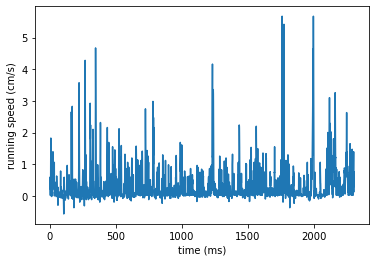

In [14]:
# plot running speed with timestamps on x-axis
import matplotlib.pyplot as plt
plt.plot(df_runspeed1ms.timestamps, df_runspeed1ms.speed1ms)
plt.ylabel('running speed (cm/s)')
plt.xlabel('time (ms)')